In [1]:
%pip install scipy==1.8.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
from matplotlib.pyplot import title
from numpy import linalg as LA

# Scale-free numerical example

In [4]:
# a function that extract real eigenvalues from a matrix
def real_eigenvalues(matrix):
    eigenvalues, eigenvectors = LA.eig(matrix)
    real_eigenvalues = []
    for i in range(len(eigenvalues)):
        if np.isreal(eigenvalues[i]):
            real_eigenvalues.append(eigenvalues[i])
    return real_eigenvalues

# a function that generates a scale-free network with n nodes
def scale_free_network(n, alpha, beta, gamma):
    G = nx.scale_free_graph(n, alpha=alpha, beta=beta, gamma=gamma)
    # get adjacency matrix
    A = nx.adjacency_matrix(G)
    return A.todense()

# a function that gets an adjacency matrix, extracts real eigenvalues of the matrix and returns the maximum and minimum eigenvalues
def max_min_eigenvalues(A):
    eigenvalues = real_eigenvalues(A)
    return max(eigenvalues), abs(min(eigenvalues))

In [5]:
A = scale_free_network(10, 0.41, 0.54, 0.05)
max_A, min_A = max_min_eigenvalues(A)
print(max_A, min_A)

(2.9196395658394163+0j) 1.0


/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_1711/3585928330.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [87]:
n_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
eig_max_avg_list = []
eig_min_avg_list = []
iteration = 1000
max_max = []
min_max = []
max_min = []
min_min = []

for n in n_list:
    eig_max = 0
    eig_min = 0
    max_list = []
    min_list = []
    for i in range(iteration):
        # three random numbers that sum up to one
        alpha = random.random()
        beta = random.random()
        gamma = random.random()
        s = alpha + beta + gamma
        alpha /= s
        beta /= s
        gamma /= s
        # generate a random scale-free network
        max_temp, min_temp = max_min_eigenvalues(scale_free_network(n, alpha, beta, gamma))
        eig_max += max_temp
        eig_min += min_temp
    eig_max /= iteration
    eig_min /= iteration
    eig_max_avg_list.append(eig_max)
    eig_min_avg_list.append(eig_min)
    


/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_2148/3585928330.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [ ]:
# plot error bar


plt.plot(n_list, eig_max_avg_list, label='max eigenvalue', color='red')
plt.plot(n_list, eig_min_avg_list, label='abs of min eigenvalue', color='blue')
plt.errorbar(n_list, eig_max_avg_list, yerr=0.5, color='red')
plt.errorbar(n_list, eig_min_avg_list, yerr=0.2, color='blue')
plt.rcParams.update({'font.size': 12})
plt.xlabel('N')
plt.ylabel('Eigenvalue')
plt.title('Scale-free network')
plt.legend()
plt.savefig('scale_free_network.png')
plt.show()


(4.544591503255168+0j) (-4.544591503255162+0j)


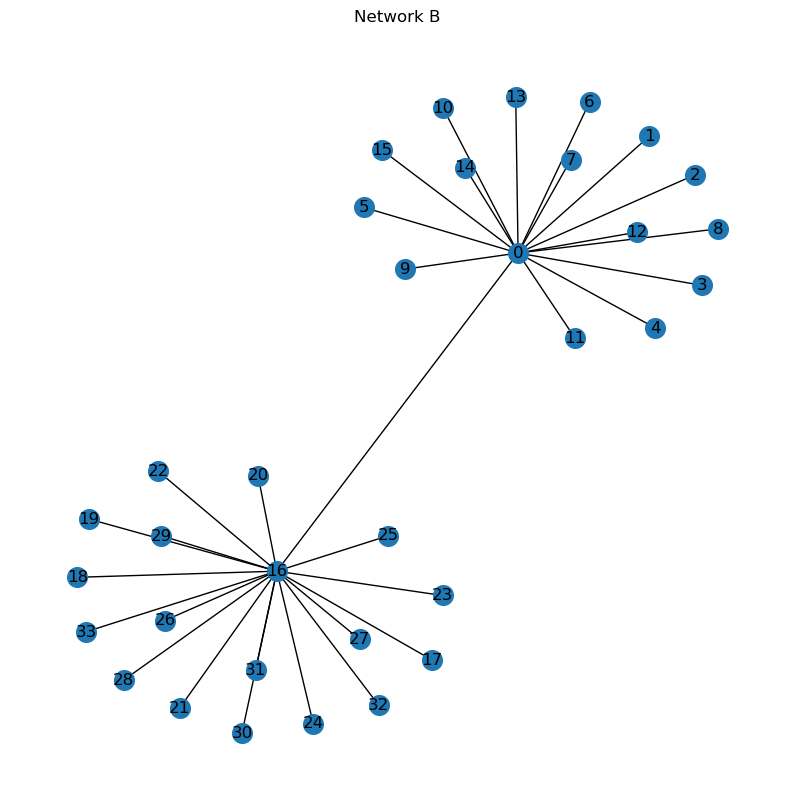

In [6]:
# create an adjacency matrix where 16 nodes are connected to another node
A = np.zeros((34, 34))
for i in range(1, 16):
    A[i][0] = 1
    A[0][i] = 1
for i in range(17, 34):
    A[i][16] = 1
    A[16][i] = 1
A[0][16] = 1
A[16][0] = 1

# get maximum and minimum eigenvalues
eigenvalues, eigenvectors = LA.eig(A)
max_A = max(eigenvalues)
min_A = min(eigenvalues)
print(max_A, min_A)

# plot a graph using adjacency matrix
plt.figure(figsize=(10, 10))
plt.title('Network B')
G = nx.from_numpy_matrix(A)
nx.draw(G, with_labels=True, node_size=200)
plt.savefig('network_B.png')

/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_1711/91675787.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  B = nx.adjacency_matrix(G)


11.249807225869251 -5.385098298887242


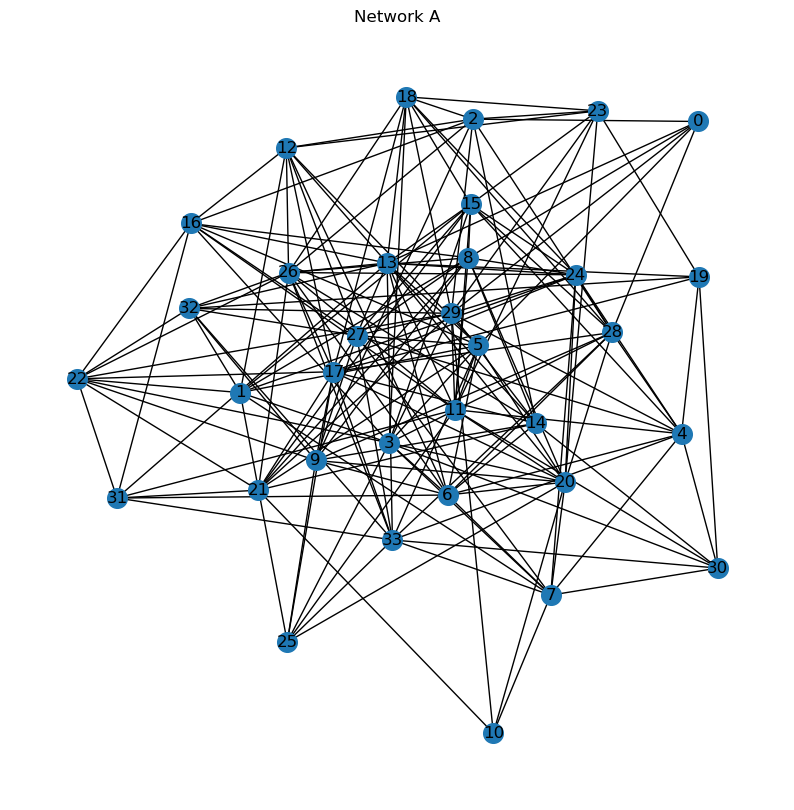

In [17]:
# create a network with 34 nodes and m edges
n = 34
m = 180
G = nx.gnm_random_graph(n, m)
B = nx.adjacency_matrix(G)
B = B.todense()
# get maximum and minimum eigenvalues
eigenvalues, eigenvectors = LA.eig(B)
max_B = max(eigenvalues)
min_B = min(eigenvalues)
print(max_B, min_B)

# plot a graph using adjacency matrix
plt.figure(figsize=(10, 10))
plt.title('Network A')
G = nx.from_numpy_matrix(B)
nx.draw(G, with_labels=True, node_size=200)
plt.savefig('network_A.png')

(21.687565903954198+0j) (-13.344913291097667+0j)


/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_2148/4136924855.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  org = nx.adjacency_matrix(G)


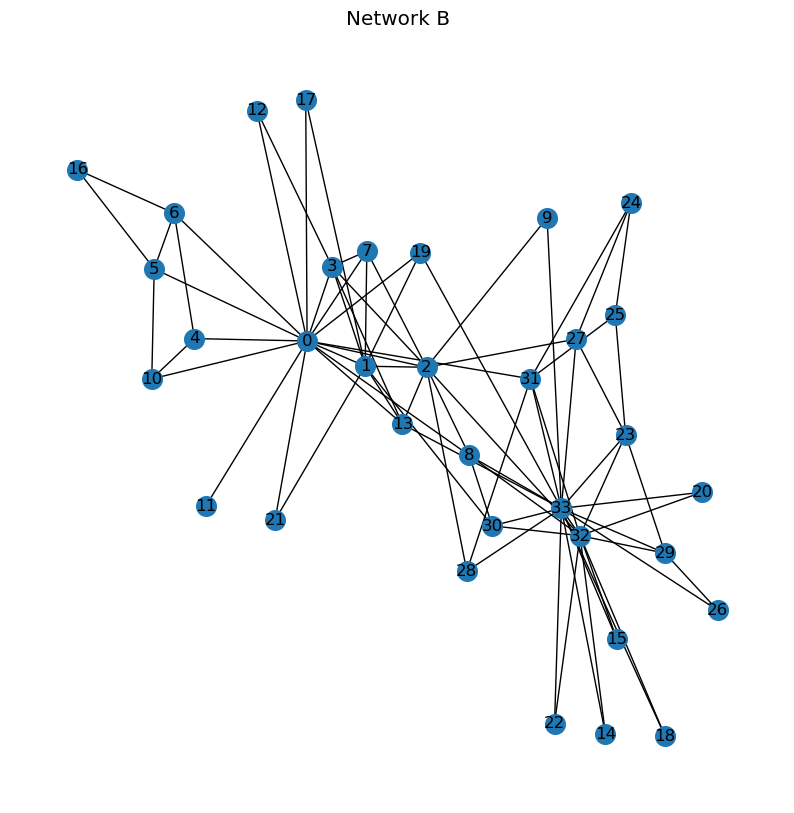

In [174]:
# get zachary karate club network
G = nx.karate_club_graph()
org = nx.adjacency_matrix(G)
org = org.todense()
# get maximum and minimum eigenvalues
eigenvalues, eigenvectors = LA.eig(org)
max_org = max(eigenvalues)
min_org = min(eigenvalues)
print(max_org, min_org)

# plot a graph using adjacency matrix
plt.figure(figsize=(10, 10))
plt.title('Network B')
G = nx.from_numpy_matrix(org)
nx.draw(G, with_labels=True, node_size=200)
plt.savefig('network_B.png')

In [47]:
marriage_network = nx.florentine_families_graph()
# print the nodes of the network
print(marriage_network.nodes())
marriage_adj = nx.adjacency_matrix(marriage_network)
marriage_adj = marriage_adj.todense()

business_adj = np.zeros((15, 15))
# get nodes of florentine families
families = {0:'Acciaiuoli', 1:'Albizzi', 2:'Barbadori', 3:'Bischeri', 4:'Castellani', 
            5:'Ginori', 6:'Guadagni', 7:'Lamberteschi', 8:'Medici', 9:'Pazzi', 10:'Peruzzi', 
            11:'Ridolfi', 12:'Salviati', 13:'Strozzi', 14:'Tornabuoni'}

business_adj[2][4] = 1
business_adj[2][5] = 1
business_adj[2][8] = 1
business_adj[2][10] = 1

business_adj[3][6] = 1
business_adj[3][7] = 1
business_adj[3][10] = 1

business_adj[4][2] = 1
business_adj[4][7] = 1
business_adj[4][10] = 1

business_adj[5][2] = 1
business_adj[5][8] = 1

business_adj[6][3] = 1
business_adj[6][7] = 1

business_adj[7][3] = 1
business_adj[7][4] = 1
business_adj[7][6] = 1
business_adj[7][10] = 1

business_adj[8][2] = 1
business_adj[8][5] = 1
business_adj[8][9] = 1
business_adj[8][12] = 1
business_adj[8][14] = 1

business_adj[9][8] = 1

business_adj[10][2] = 1
business_adj[10][3] = 1
business_adj[10][4] = 1
business_adj[10][7] = 1

business_adj[12][8] = 1

business_adj[14][8] = 1

['Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi']


/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_1711/1465172370.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  marriage_adj = nx.adjacency_matrix(marriage_network)


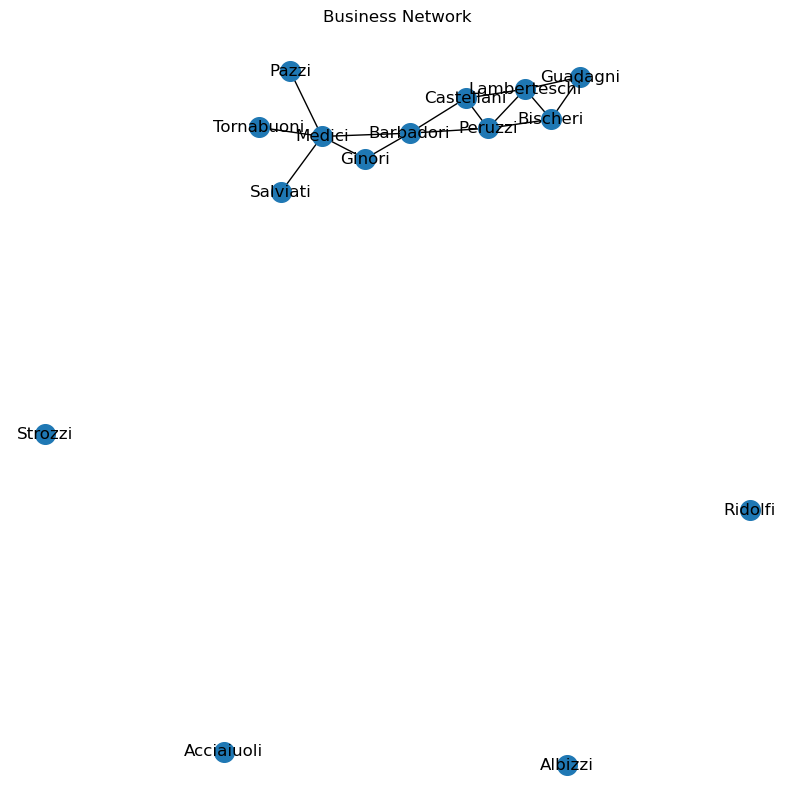

In [48]:
# create a network with nodes named as florentine families and edges as business
G = nx.from_numpy_matrix(business_adj)
G = nx.relabel_nodes(G, families)
plt.figure(figsize=(10, 10))
plt.title('Business Network')
nx.draw(G, with_labels=True, node_size=200)

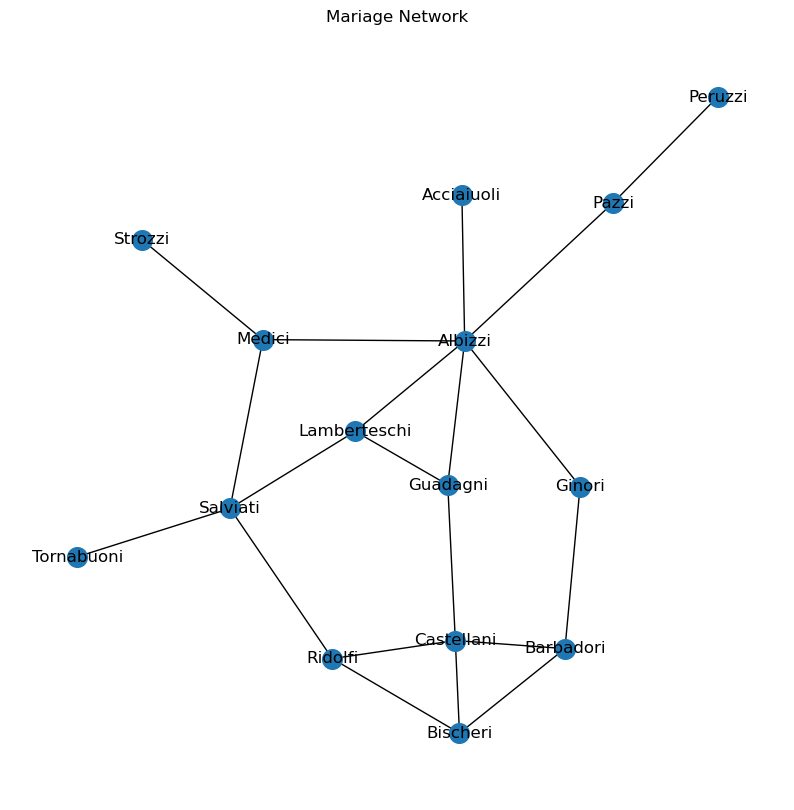

In [49]:
# create a network with nodes named as florentine families and edges as mariage
G = nx.from_numpy_matrix(marriage_adj)
G = nx.relabel_nodes(G, families)
plt.figure(figsize=(10, 10))
plt.title('Mariage Network')
nx.draw(G, with_labels=True, node_size=200)

In [51]:
# get maximum and minimum eigenvalues of mariage network
eigenvalues, eigenvectors = LA.eig(marriage_adj)
max_marriage = max(eigenvalues)
min_marriage = min(eigenvalues)
print(max_marriage, min_marriage)

# get maximum and minimum eigenvalues of business network
eigenvalues, eigenvectors = LA.eig(business_adj)
max_business = max(eigenvalues)
min_business = min(eigenvalues)
print(max_business, min_business)


3.2561037454308597 -2.695838719994777
3.3141423952097604 -2.2072113793666333


In [52]:
print(np.shape(marriage_adj))
print(np.shape(business_adj))

(15, 15)
(15, 15)


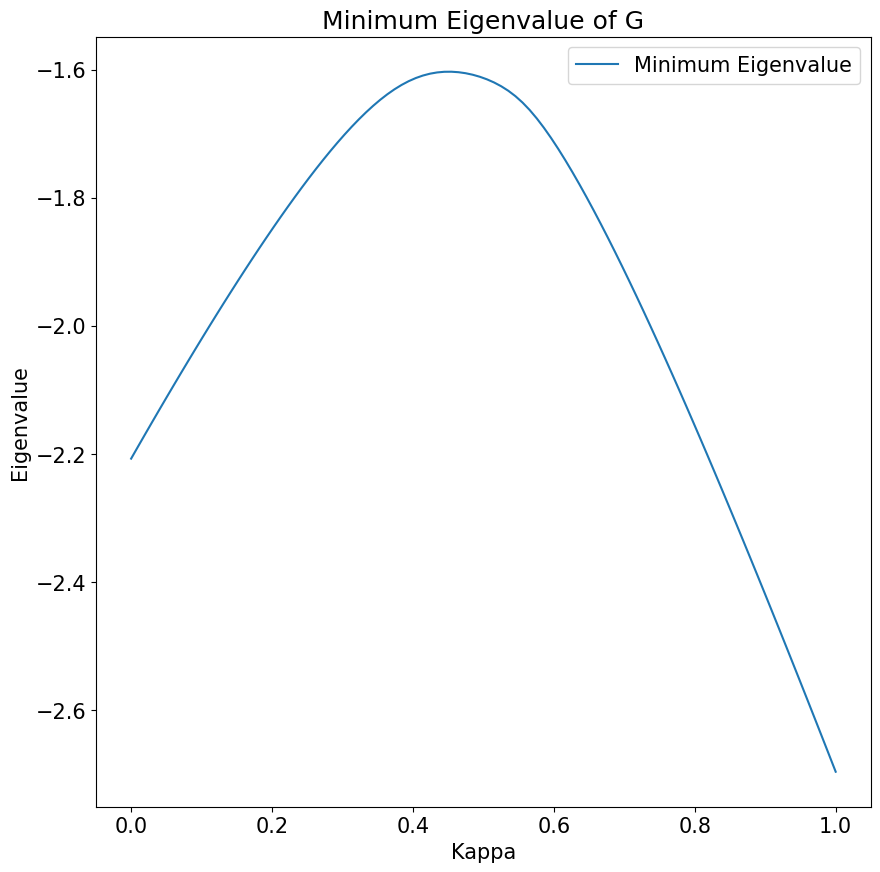

In [59]:
kappa_list = np.linspace(0, 1, 100)
min_G = []
for kappa in kappa_list:
    G = kappa*marriage_adj+(1-kappa)*business_adj
    eigenvalues, eigenvectors = LA.eig(G)
    min_G.append(min(eigenvalues))

plt.figure(figsize=(10, 10))
plt.title('Minimum Eigenvalue of G')
plt.plot(kappa_list, min_G, label='Minimum Eigenvalue')
plt.rcParams.update({'font.size': 15})
plt.xlabel('Kappa')
plt.ylabel('Eigenvalue')
plt.legend()
plt.savefig('florentine-families.png')

# KNOKE BUREAUCRACIES:

In [3]:
# read datasets from csv files
#  for kappa = 0.5
information_df = 0.5*pd.read_csv('/Users/macbook/Desktop/Research/MultilayerGame/Datasets for numerical experiments/KNOKE BUREAUCRACIES/information.csv', header=None)
money_df = 0.5*pd.read_csv('/Users/macbook/Desktop/Research/MultilayerGame/Datasets for numerical experiments/KNOKE BUREAUCRACIES/money.csv', header=None)

In [4]:
print(information_df)
print('\n')
print(money_df)

     0    1    2    3    4    5    6    7    8    9
0  0.0  0.5  0.0  0.0  0.5  0.0  0.5  0.0  0.5  0.0
1  0.5  0.0  0.5  0.5  0.5  0.0  0.5  0.5  0.5  0.0
2  0.0  0.5  0.0  0.5  0.5  0.5  0.5  0.0  0.0  0.5
3  0.5  0.5  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0
4  0.5  0.5  0.5  0.5  0.0  0.0  0.5  0.5  0.5  0.5
5  0.0  0.0  0.5  0.0  0.0  0.0  0.5  0.0  0.5  0.0
6  0.0  0.5  0.0  0.5  0.5  0.0  0.0  0.0  0.0  0.0
7  0.5  0.5  0.0  0.5  0.5  0.0  0.5  0.0  0.5  0.0
8  0.0  0.5  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0
9  0.5  0.5  0.5  0.0  0.5  0.0  0.5  0.0  0.0  0.0


     0    1    2    3    4    5    6    7    8    9
0  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.5  0.5  0.5
1  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.0
3  0.0  0.5  0.5  0.0  0.0  0.0  0.5  0.5  0.5  0.0
4  0.0  0.5  0.5  0.0  0.0  0.0  0.0  0.5  0.5  0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.0
7  0.0  0.

In [5]:
# create graph from data frame of adjacency matrix
G_info = nx.from_numpy_matrix(information_df.values, create_using=nx.DiGraph)
# get maximum and minimum eigenvalues
eigenvalues_info, eigenvectors = LA.eig(information_df.values)
max_information = max(eigenvalues_info)
min_information = min(eigenvalues_info)
print(eigenvalues_info)
print(max_information, min_information)

[ 2.58109186e+00+0.j          5.16994462e-01+0.j
 -1.01281504e+00+0.j         -2.23700929e-01+0.37361222j
 -2.23700929e-01-0.37361222j -2.17602286e-01+0.j
 -5.00000005e-01+0.j         -4.99999995e-01+0.j
 -4.20267133e-01+0.j          3.90726753e-16+0.j        ]
(2.581091856139479+0j) (-1.0128150402047311+0j)


In [6]:
# create directed graph from data frame of adjacency matrix
G_money = nx.from_numpy_matrix(money_df.values, create_using=nx.DiGraph)
# get maximum and minimum eigenvalues
eigenvalues_money, eigenvectors = LA.eig(money_df.values)
max_money = max(eigenvalues_money)
min_money = min(eigenvalues_money)
print(eigenvalues_money)
print(max_money, min_money)


[ 0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.66235898+0.j
 -0.33117949+0.28113976j -0.33117949-0.28113976j  0.        +0.j
  0.        +0.j        ]
(0.6623589786223725+0j) (-0.33117948931118646-0.2811397560311505j)


{0: Text(1.0, 2.662367085193061e-08, '0'),
 1: Text(0.8090170042900712, 0.5877852653564984, '1'),
 2: Text(0.3090169789580973, 0.9510565581329226, '2'),
 3: Text(-0.3090170206813483, 0.9510564985282783, '3'),
 4: Text(-0.8090170460133221, 0.5877852057518542, '4'),
 5: Text(-0.9999999821186069, -6.079910493992474e-08, '5'),
 6: Text(-0.8090169268040337, -0.5877853313184453, '6'),
 7: Text(-0.3090170802859925, -0.9510564452809367, '7'),
 8: Text(0.3090171279697079, -0.9510564452809367, '8'),
 9: Text(0.809016944685427, -0.587785271713801, '9')}

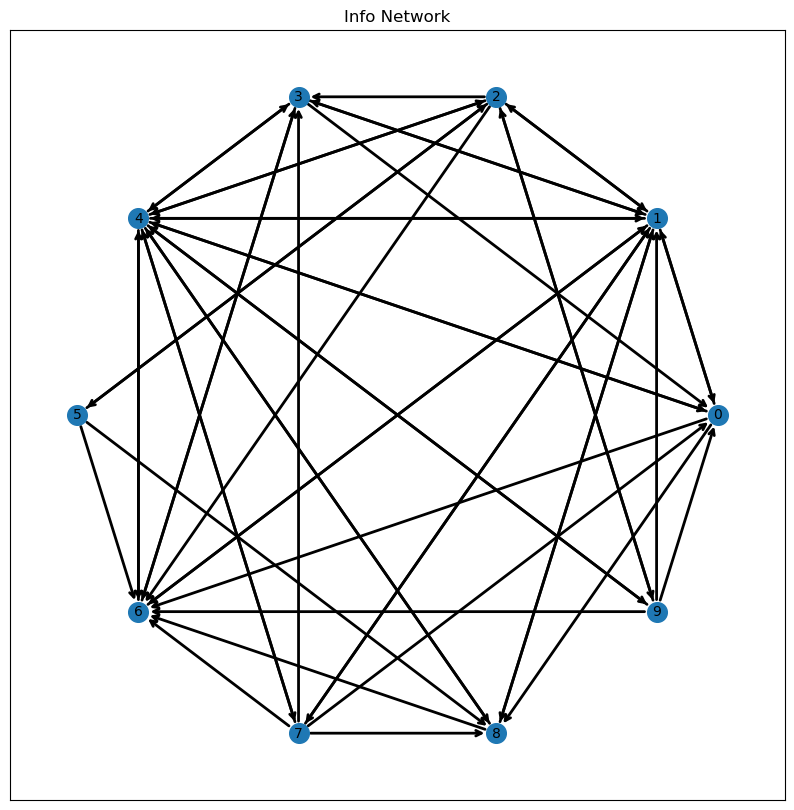

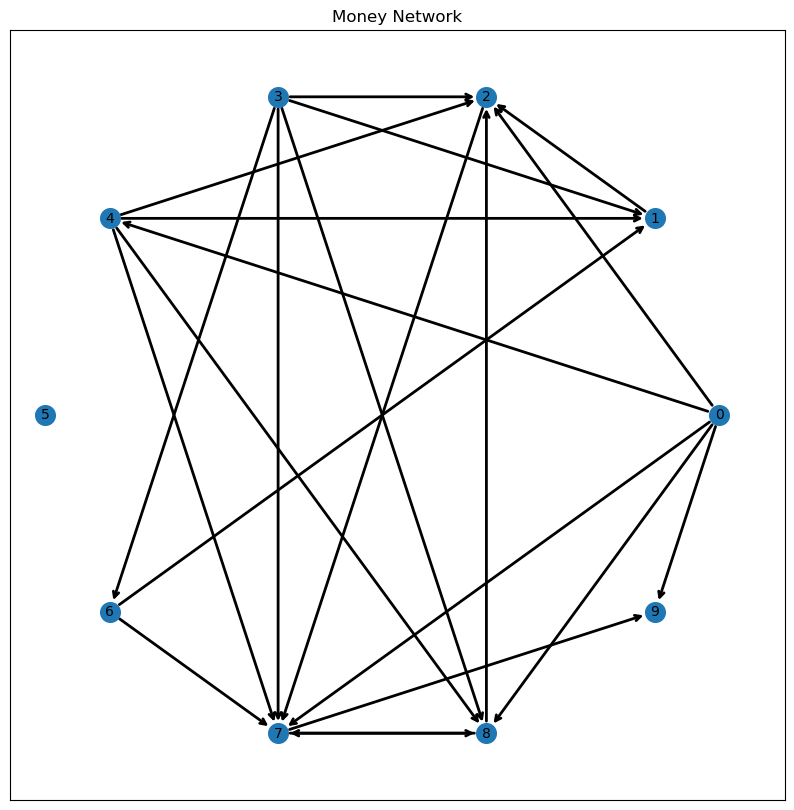

In [8]:
# plot formal and informal networks
plt.figure(figsize=(10, 10))
plt.title('Info Network')
pos1 = nx.circular_layout(G_info, center=None)
nodes = nx.draw_networkx_nodes(G_info, pos1, node_size=200)
edges = nx.draw_networkx_edges(
    G_info,
    pos1,
    arrowstyle="->",
    arrowsize=10,
    width=2,
)
nx.draw_networkx_labels(G_info, pos1, font_size=10, font_family="sans-serif")


plt.figure(figsize=(10, 10))
plt.title('Money Network')
pos2 = nx.circular_layout(G_money, center=None)
nodes = nx.draw_networkx_nodes(G_money, pos2, node_size=200)
edges = nx.draw_networkx_edges(
    G_money,
    pos2,
    arrowstyle="->",
    arrowsize=10,
    width=2,
)
nx.draw_networkx_labels(G_money, pos2, font_size=10, font_family="sans-serif")

In [58]:
multiplex = information_df.values + money_df.values
G_multiplex = nx.Graph(nx.from_numpy_matrix(multiplex, create_using=nx.DiGraph))
# get maximum and minimum eigenvalues
eigenvalues_multiplex, eigenvectors = LA.eig(multiplex)
max_multiplex = max(eigenvalues_multiplex)
min_multiplex = min(eigenvalues_multiplex)
print(eigenvalues_multiplex)
print(max_multiplex, min_multiplex)

[ 3.77039446+0.j          0.27842347+0.1982329j   0.27842347-0.1982329j
 -0.64961874+0.54678992j -0.64961874-0.54678992j -0.2586962 +0.26257649j
 -0.2586962 -0.26257649j -0.89293747+0.27770853j -0.89293747-0.27770853j
 -0.72473656+0.j        ]
(3.7703944610097295+0j) (-0.8929374735516271-0.2777085255588423j)


# KAPFERER TAILOR SHOP:

In [20]:
TI1_df = pd.read_csv('/Users/macbook/Desktop/Research/MultilayerGame/Datasets for numerical experiments/KAPFERER TAILOR SHOP/TI1.csv', header=None)
TS1_df = pd.read_csv('/Users/macbook/Desktop/Research/MultilayerGame/Datasets for numerical experiments/KAPFERER TAILOR SHOP/TS1.csv', header=None)

In [21]:
# create graph from data frame of adjacency matrix
G_TI1 = nx.from_numpy_matrix(TI1_df.values, create_using=nx.DiGraph)
# get maximum and minimum eigenvalues
eigenvalues_TI1, eigenvectors = LA.eig(TI1_df.values)
max_TI1 = max(eigenvalues_TI1)
min_TI1 = min(eigenvalues_TI1)
# print(eigenvalues_TI1)
print(max_TI1, min_TI1)

(4.547807779540104+0j) (-2.556620755746121+0j)


In [22]:
# create graph from data frame of adjacency matrix
G_TS1 = nx.from_numpy_matrix(TS1_df.values, create_using=nx.DiGraph)
# get maximum and minimum eigenvalues
eigenvalues_TS1, eigenvectors = LA.eig(TS1_df.values)
max_TS1 = max(eigenvalues_TS1)
min_TS1 = min(eigenvalues_TS1)
# print(eigenvalues_TS1)
print(max_TS1, min_TS1)

10.629636968580192 -4.458847236149425


In [23]:
multiplex = TI1_df.values + TS1_df.values
G_multiplex = nx.Graph(nx.from_numpy_matrix(multiplex, create_using=nx.DiGraph))
# get maximum and minimum eigenvalues
eigenvalues_multiplex, eigenvectors = LA.eig(multiplex)
max_multiplex = max(eigenvalues_multiplex)
min_multiplex = min(eigenvalues_multiplex)
# print(eigenvalues_multiplex)
print(max_multiplex, min_multiplex)

(14.765501543141337+0j) (-5.96529283237785+0j)


# THURMAN OFFICE:


In [3]:
formal_df = pd.read_csv('/Users/macbook/Desktop/Research/MultilayerGame/Datasets for numerical experiments/THURMAN OFFICE/Formal.csv', header=None)
informal_df = pd.read_csv('/Users/macbook/Desktop/Research/MultilayerGame/Datasets for numerical experiments/THURMAN OFFICE/Informal.csv', header=None)

In [4]:
# create graph from data frame of adjacency matrix
G_formal = nx.from_numpy_matrix(formal_df.values, create_using=nx.DiGraph)
# get maximum and minimum eigenvalues
eigenvalues_formal, eigenvectors = LA.eig(formal_df.values)
max_formal = max(eigenvalues_formal)
min_formal = min(eigenvalues_formal)
print(eigenvalues_formal)
print(max_formal, min_formal)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0 0.0


In [5]:
# create graph from data frame of adjacency matrix
G_informal = nx.from_numpy_matrix(informal_df.values, create_using=nx.DiGraph)
# get maximum and minimum eigenvalues
eigenvalues_informal, eigenvectors = LA.eig(informal_df.values)
max_informal = max(eigenvalues_informal)
min_informal = min(eigenvalues_informal)
print(eigenvalues_informal)
print(max_informal, min_informal)

[ 5.76530021e+00 -3.13613657e+00  2.41713642e+00  2.02873979e+00
 -2.28941523e+00  6.47576247e-01  4.22139026e-01 -1.66747482e+00
 -1.38549109e+00 -1.04724941e+00 -5.30456212e-01 -2.24668358e-01
  1.11022302e-16 -1.00000000e+00  0.00000000e+00]
5.765300209019547 -3.136136571506106


In [6]:
multiplex = formal_df.values + informal_df.values
G_multiplex = nx.Graph(nx.from_numpy_matrix(multiplex, create_using=nx.DiGraph))
# get maximum and minimum eigenvalues
eigenvalues_multiplex, eigenvectors = LA.eig(multiplex)
max_multiplex = max(eigenvalues_multiplex)
min_multiplex = min(eigenvalues_multiplex)
# print(eigenvalues_multiplex)
print(max_multiplex, min_multiplex)

(7.54181599522263+0j) (-3.5489949255003213+0j)


{0: Text(1.0, 5.960464622608208e-09, '0'),
 1: Text(0.9135454276023933, 0.406736657982119, '1'),
 2: Text(0.669130555683075, 0.7431448938519257, '2'),
 3: Text(0.30901695596269313, 0.9510565691201746, '3'),
 4: Text(-0.10452853596304768, 0.9945219460783279, '4'),
 5: Text(-0.500000096112492, 0.866025415279093, '5'),
 6: Text(-0.8090171062160721, 0.5877852046497042, '6'),
 7: Text(-0.9781476740684291, 0.20791162162406715, '7'),
 8: Text(-0.9781476144637828, -0.20791178851707656, '8'),
 9: Text(-0.8090169870067796, -0.5877853715427136, '9'),
 10: Text(-0.4999999471008764, -0.86602546296281, '10'),
 11: Text(-0.10452836459968978, -0.9945219341573988, '11'),
 12: Text(0.3090171049743087, -0.9510564975945991, '12'),
 13: Text(0.6691307344970137, -0.7431447627217042, '13'),
 14: Text(0.9135455468116859, -0.40673649704957426, '14')}

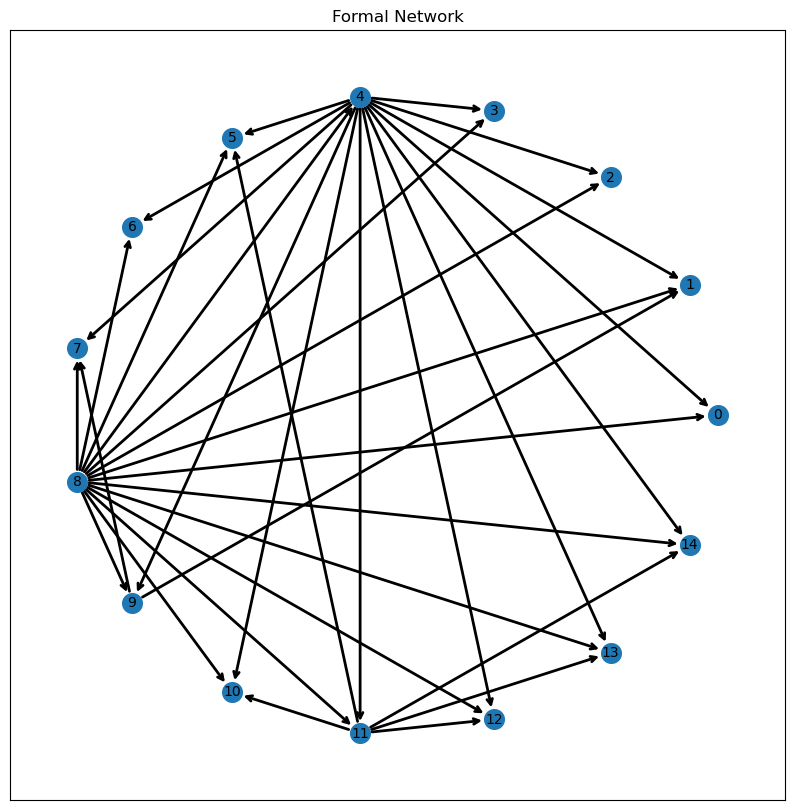

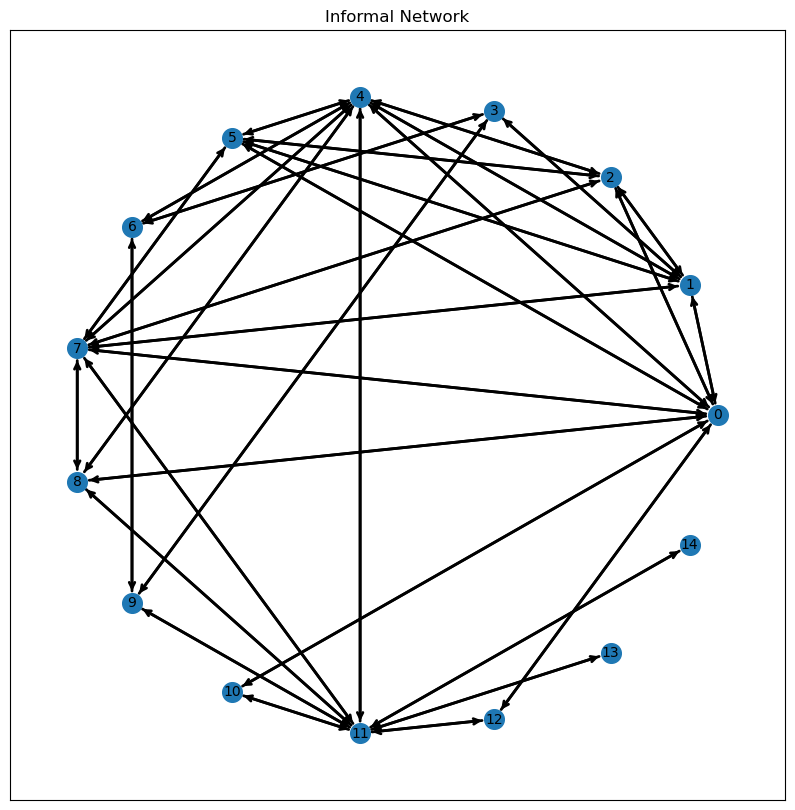

In [55]:
# plot formal and informal networks
plt.figure(figsize=(10, 10))
plt.title('Formal Network')
pos1 = nx.circular_layout(G_formal, center=None)
nodes = nx.draw_networkx_nodes(G_formal, pos1, node_size=200)
edges = nx.draw_networkx_edges(
    G_formal,
    pos1,
    arrowstyle="->",
    arrowsize=10,
    width=2,
)
nx.draw_networkx_labels(G_formal, pos1, font_size=10, font_family="sans-serif")


plt.figure(figsize=(10, 10))
plt.title('Informal Network')
pos2 = nx.circular_layout(G_informal, center=None)
nodes = nx.draw_networkx_nodes(G_informal, pos2, node_size=200)
edges = nx.draw_networkx_edges(
    G_informal,
    pos2,
    arrowstyle="->",
    arrowsize=10,
    width=2,
)
nx.draw_networkx_labels(G_informal, pos2, font_size=10, font_family="sans-serif")

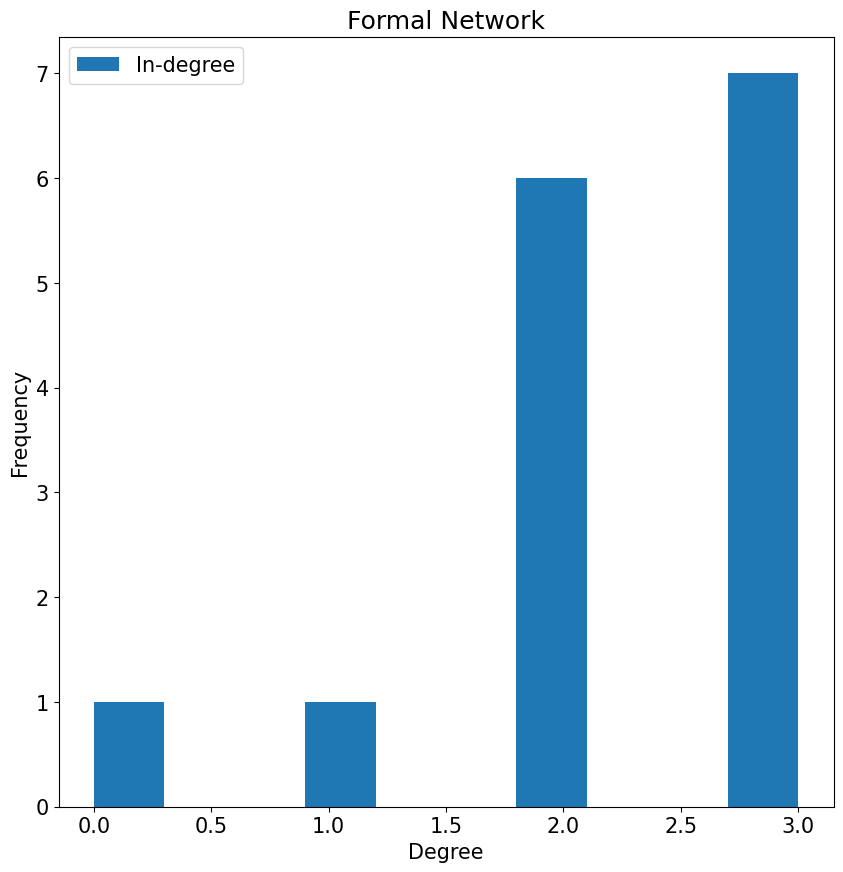

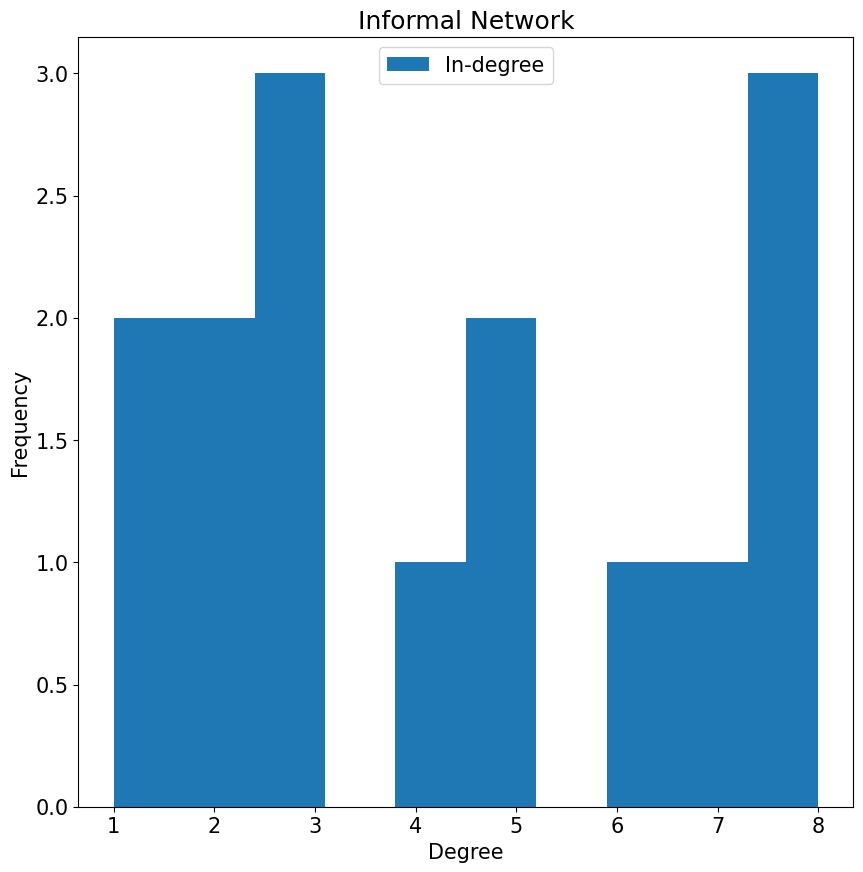

In [59]:
# plot out-degree and in-degree distribution of formal and informal networks
plt.figure(figsize=(10, 10))
plt.title('Formal Network')
plt.hist(list(dict(G_formal.in_degree()).values()), bins=10, label='In-degree')
# plt.hist(list(dict(G_formal.out_degree()).values()), bins=10, label='Out-degree')
plt.rcParams.update({'font.size': 15})
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
# plt.savefig('formal.png')
plt.show()

plt.figure(figsize=(10, 10))
plt.title('Informal Network')
plt.hist(list(dict(G_informal.in_degree()).values()), bins=10, label='In-degree')
# plt.hist(list(dict(G_informal.out_degree()).values()), bins=10, label='Out-degree')
plt.rcParams.update({'font.size': 15})
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
# plt.savefig('informal.png')
plt.show()